<a href="https://colab.research.google.com/github/Yashgabani845/ml/blob/main/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
zip_path = '/content/drive/MyDrive/asl.zip'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/asl')



Start coding of ASL


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint


In [6]:
# Image data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split dataset for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for test data

# Load training and validation data
train_data = train_datagen.flow_from_directory(
    '/content/asl/asl_aslphabet/asl_alphabet_train/asl_alphabet_train',  # Path to training data
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,  # Use a batch size of 32
    class_mode='categorical',  # Since it's a classification task
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    '/content/asl/asl_aslphabet/asl_alphabet_train/asl_alphabet_train',  # Path to training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [7]:
# Update the CNN model to have 29 output neurons
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')  # Change the number of classes here (29)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()  # Check the model architecture


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [8]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,  # Number of epochs
    verbose=1
)


Epoch 1/5
2175/2175 [==============================] - 509s 233ms/step - loss: 2.4447 - accuracy: 0.2606 - val_loss: 1.8485 - val_accuracy: 0.4571
Epoch 2/5
2175/2175 [==============================] - 502s 231ms/step - loss: 1.3397 - accuracy: 0.5517 - val_loss: 1.2567 - val_accuracy: 0.6031
Epoch 3/5
2175/2175 [==============================] - 498s 229ms/step - loss: 0.9443 - accuracy: 0.6795 - val_loss: 1.0332 - val_accuracy: 0.6545
Epoch 4/5
2175/2175 [==============================] - 505s 232ms/step - loss: 0.7190 - accuracy: 0.7543 - val_loss: 0.9497 - val_accuracy: 0.6918
Epoch 5/5
2175/2175 [==============================] - 500s 230ms/step - loss: 0.5907 - accuracy: 0.8016 - val_loss: 0.8317 - val_accuracy: 0.7389


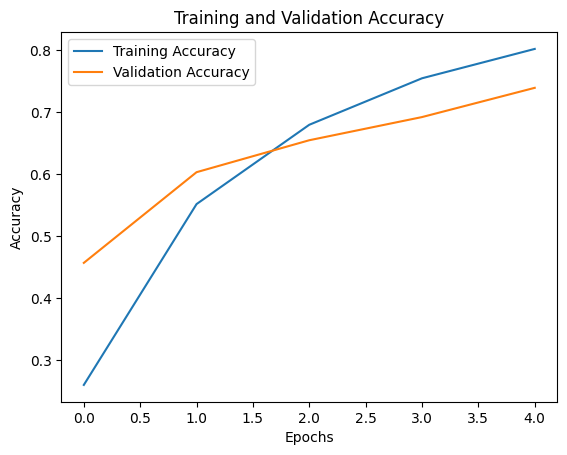

In [9]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Load test data
test_data = test_datagen.flow_from_directory(
    '/content/asl/asl_aslphabet/asl_alphabet_test/asl_alphabet_test',  # Path to test data
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict classes for the test dataset
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

# Generate a classification report
class_names = list(test_data.class_indices.keys())
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)


NameError: name 'test_data' is not defined